# CIC-MalMem-2022 Answer File

### Author: Akeem Abrahams

**CIC-MalMem-2022 Original Dataset Source:  University of New Brunswick | UNB - Canadian Institute for Cybersecurity . https://www.unb.ca/cic/datasets/malmem-2022.html**


**CIC-MalMem-2022 Modified Dataset: https://raw.githubusercontent.com/rubaomari/mal/refs/heads/main/CIC-MalMem-2022-Modified-RA.csv**

In [1]:
#import libraries
#you can install missing libraries using pip install, example: pip install numpy
from sklearnex import patch_sklearn
patch_sklearn()  # Apply Intel optimizations

import warnings
warnings.filterwarnings("ignore")

import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Intel(R) Extension for Scikit-learn* enabled (https://github.com/uxlfoundation/scikit-learn-intelex)


Tip: If you get future warnings you can ignore them using:

import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

# Task 1-Exploratory Data Analysis

<span style="color: yellow;">15 Marks, 3 marks per step from step1 to step5</span>


Load the dataset using Pandas into a DataFrame, which is the object Pandas uses to store tables of data.
Pandas uses two objects for storing datasets: the DataFrame and the Series.
Series is used for datasets with only one column, and DataFrame is used for datasets of more than one column.

### 1. Load the dataset

In [2]:
#load the dataset
url = "https://raw.githubusercontent.com/rubaomari/mal/refs/heads/main/CIC-MalMem-2022.csv"
malware_df = pd.read_csv(url, sep=',')

#let's create a backup copy of the dataset
malware_df_backup = malware_df.copy()

### 2. Take a quick look at the data structure


#### Use head() to look at the first 5 rows, you can also choose to look at more than the first 5 rows using head(10).


In [3]:
malware_df.head()

,Category,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,...,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,Class
0,Benign,45,17,10.555556,0,202.844444,1694,38.500000,9129,212.302326,...,221,26,24,116,0,121,87,0,8,Benign
1,Benign,47,19,11.531915,0,242.234043,2074,44.127660,11385,242.234043,...,222,26,24,118,0,122,87,0,8,Benign
2,Benign,40,14,14.725000,0,288.225000,1932,48.300000,11529,288.225000,...,222,26,27,118,0,120,88,0,8,Benign
3,Benign,32,13,13.500000,0,264.281250,1445,45.156250,8457,264.281250,...,222,26,27,118,0,120,88,0,8,Benign
4,Benign,42,16,11.452381,0,281.333333,2067,49.214286,11816,281.333333,...,222,26,24,118,0,124,87,0,8,Benign


#### Use describe() method to see a summary of the numerical attributes.

In [4]:
malware_df.describe()

,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,handles.nport,...,svcscan.nservices,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric
count,58596.000000,58596.000000,58596.000000,58596.0,58596.000000,58596.000000,58596.000000,5.859600e+04,58596.000000,58596.0,...,58596.000000,58596.000000,58596.000000,58596.000000,58596.000000,58596.0,58596.000000,58596.000000,58596.000000,58596.000000
mean,41.394771,14.713837,11.341655,0.0,247.509819,1810.805447,43.707806,1.025858e+04,249.560958,0.0,...,391.347549,221.406581,25.996245,25.063417,116.879514,0.0,121.995546,86.905659,0.000853,7.999881
std,5.777249,2.656748,1.588231,0.0,111.857790,329.782639,5.742023,4.866864e+03,145.999866,0.0,...,4.529704,1.991087,0.170790,1.529628,1.550401,0.0,2.822858,3.134117,0.029199,0.010929
min,21.000000,8.000000,1.650000,0.0,34.962500,670.000000,7.333333,3.514000e+03,71.139241,0.0,...,94.000000,55.000000,6.000000,7.000000,26.000000,0.0,30.000000,50.000000,0.000000,7.000000
25%,40.000000,12.000000,9.972973,0.0,208.725000,1556.000000,38.833333,8.393000e+03,209.648228,0.0,...,389.000000,221.000000,26.000000,24.000000,116.000000,0.0,121.000000,87.000000,0.000000,8.000000
50%,41.000000,15.000000,11.000000,0.0,243.963710,1735.000000,42.781524,9.287500e+03,247.208951,0.0,...,389.000000,221.000000,26.000000,24.000000,116.000000,0.0,122.000000,87.000000,0.000000,8.000000
75%,43.000000,16.000000,12.861955,0.0,289.974322,2087.000000,49.605280,1.219300e+04,291.355050,0.0,...,395.000000,222.000000,26.000000,27.000000,118.000000,0.0,123.000000,88.000000,0.000000,8.000000
max,240.000000,72.000000,16.818182,0.0,24845.951220,3443.000000,53.170732,1.047310e+06,33784.193550,0.0,...,395.000000,222.000000,26.000000,27.000000,118.000000,0.0,129.000000,89.000000,1.000000,8.000000


#### Use info() to get a quick description of the data, the total number of rows, each attribute’s type, and the number of non-null values.

The original dataset from UNB doesn't have any missing values. I have randomly removed values so we can discuss what to do with missing data.

In [5]:
malware_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58596 entries, 0 to 58595
Data columns (total 57 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Category                                58596 non-null  object 
 1   pslist.nproc                            58596 non-null  int64  
 2   pslist.nppid                            58596 non-null  int64  
 3   pslist.avg_threads                      58596 non-null  float64
 4   pslist.nprocs64bit                      58596 non-null  int64  
 5   pslist.avg_handlers                     58596 non-null  float64
 6   dlllist.ndlls                           58596 non-null  int64  
 7   dlllist.avg_dlls_per_proc               58596 non-null  float64
 8   handles.nhandles                        58596 non-null  int64  
 9   handles.avg_handles_per_proc            58596 non-null  float64
 10  handles.nport                           58596 non-null  in

#### Use value_counts to show what categories exist and how many rows belong to each Category and to each Class

In [6]:
malware_df["Category"].value_counts()

,count
Category,
Benign,29298
Spyware-Gator-1c227a11e3d4987630bf89b1712442a4d3e5cb551d13273811ec47c237a8b303-7.raw,2
Spyware-Gator-1bd318a4df278d1bd30e910b858aec9a1db674474b0e6d2d803648a43aa8023d-6.raw,2
Spyware-Gator-1bd318a4df278d1bd30e910b858aec9a1db674474b0e6d2d803648a43aa8023d-7.raw,2
Spyware-Gator-1bd318a4df278d1bd30e910b858aec9a1db674474b0e6d2d803648a43aa8023d-8.raw,2
...,...
Ransomware-Ako-00a2c6bab1e53f679cdd4fdc772cd291928c109b9b747652639a1700d844f719-3.raw,1
Ransomware-Ako-00a2c6bab1e53f679cdd4fdc772cd291928c109b9b747652639a1700d844f719-2.raw,1
Ransomware-Ako-00a2c6bab1e53f679cdd4fdc772cd291928c109b9b747652639a1700d844f719-10.raw,1


In [7]:
malware_df["Class"].value_counts()

,count
Class,
Benign,29298
Malware,29298


### 3. Plot a pie of the data classes

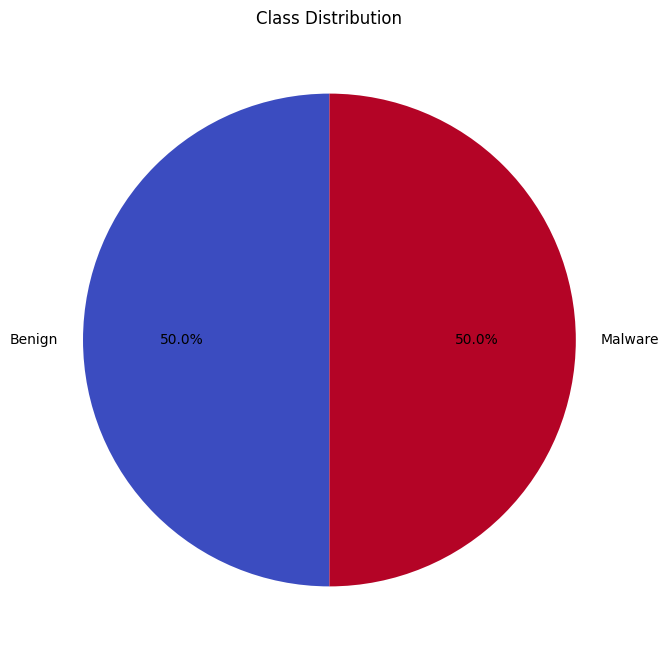

In [8]:
plt.figure(figsize=(8, 8))
malware_df["Class"].value_counts().plot.pie(autopct="%1.1f%%", cmap="coolwarm", startangle=90)
plt.title("Class Distribution")
plt.ylabel("")  # Removes the 'ylabel' text for cleaner display
plt.show()

### 4. Plot a a histogram of the features

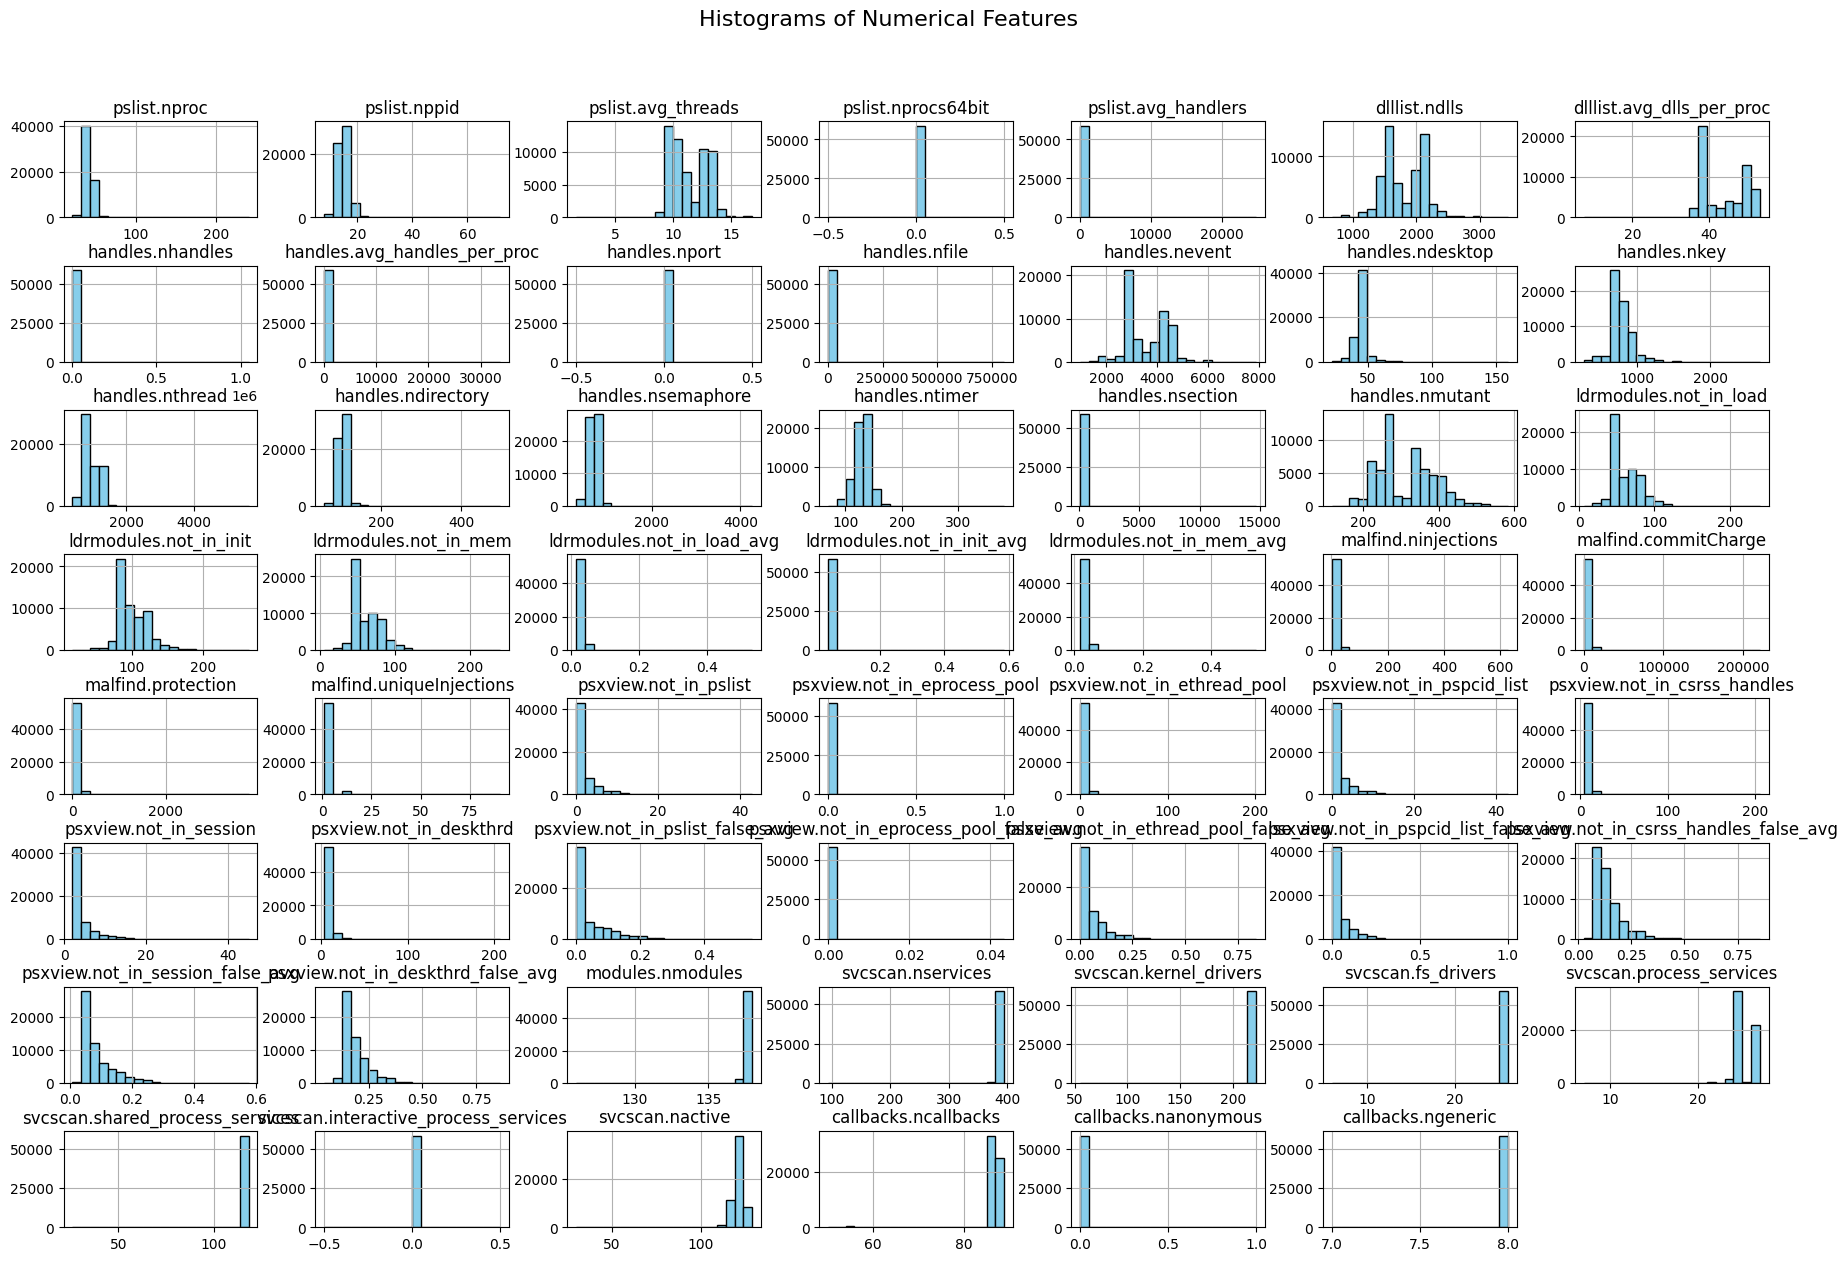

In [9]:
# Plot histograms of all numerical features
malware_df.hist(bins=20, figsize=(22, 14), color='skyblue', edgecolor='black')
# Adjust spacing to prevent overlap
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.subplots_adjust(top=0.9, hspace=0.5)  # Adjust the top margin and vertical spacing
plt.show()

### 5. Look for correlations using Pearson correlation coefficient.

Pearson Correlation Matrix:
                                        pslist.nproc  pslist.nppid  \
pslist.nproc                                1.000000      0.485450   
pslist.nppid                                0.485450      1.000000   
pslist.avg_threads                         -0.208960     -0.726761   
pslist.nprocs64bit                               NaN           NaN   
pslist.avg_handlers                        -0.004850     -0.224777   
dlllist.ndlls                               0.567111     -0.094653   
dlllist.avg_dlls_per_proc                  -0.006901     -0.594012   
handles.nhandles                            0.207611     -0.093094   
handles.avg_handles_per_proc                0.021915     -0.160602   
handles.nport                                    NaN           NaN   
handles.nfile                               0.025362     -0.014648   
handles.nevent                              0.439907     -0.284957   
handles.ndesktop                            0.797307      0.44

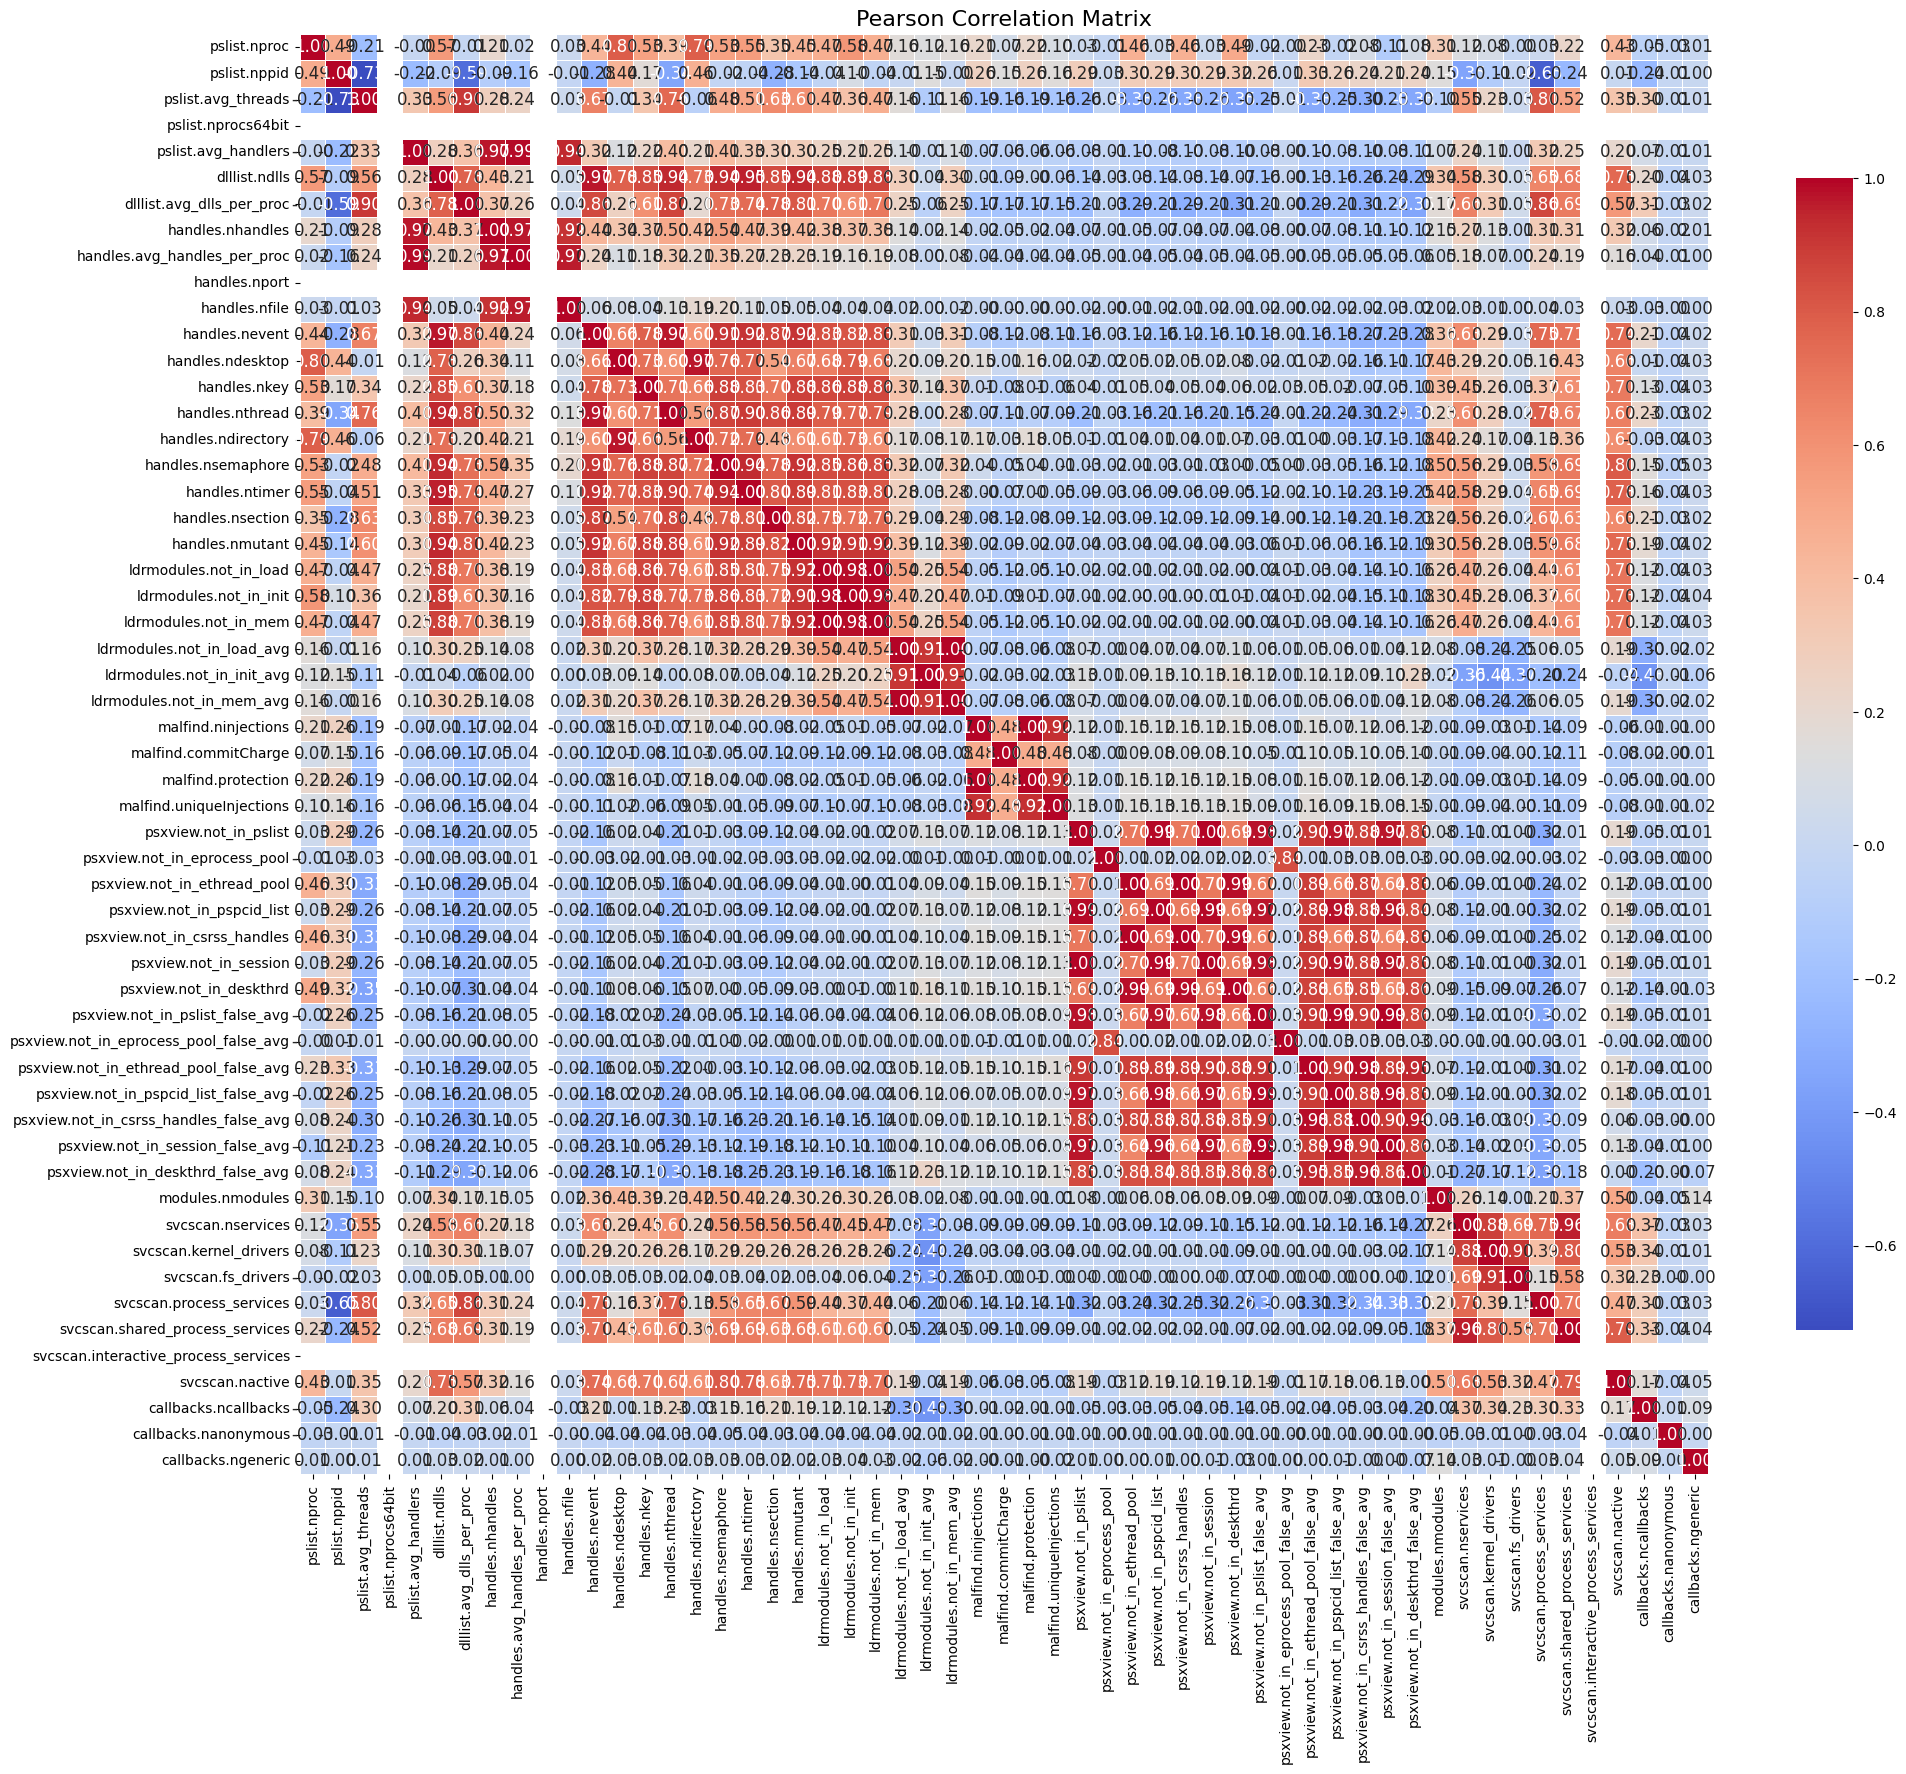

In [10]:
# Select only numeric columns from the dataset
numeric_df = malware_df.select_dtypes(include=['float64', 'int64'])

# Compute the Pearson correlation coefficient matrix for numeric columns
correlation_matrix = numeric_df.corr(method='pearson')

# Display the correlation matrix
print("Pearson Correlation Matrix:")
print(correlation_matrix)

# Increase the figure size to add more space
plt.figure(figsize=(22, 18))

# Plot the correlation matrix as a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f',
            linewidths=0.5, annot_kws={"size": 12}, cbar_kws={'shrink': 0.8})

# Adjust the layout for more space
plt.title("Pearson Correlation Matrix", fontsize=16)
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)  # Adjust the margins for more space

plt.show()


# Task 2-Prepare the Data for ML Algorithms

<span style="color: yellow;">24 Marks, 3 marks per step from step6 to step13</span>

### 6. Extract malware category and malware family from the unique identifiers.


In [11]:
# Extract malware category and family using regex
#malware_df[['MalwareCategory', 'MalwareFamily']] = malware_df['Category'].str.extract(r'([^-]+)-([a-zA-Z\-]+?)(?=-|$)')

# Function to extract MalwareCategory and MalwareFamily
def extract_category_and_family(category):
    # Check if the category is "Benign" or if it doesn't contain a hyphen
    if '-' not in category:
        return category, ''
    else:
        # Regex to extract MalwareCategory and MalwareFamily from categories with hyphen
        return category.split('-')[0], category.split('-')[1]

# Apply the extraction function to each row
malware_df[['MalwareCategory', 'MalwareFamily']] = malware_df['Category'].apply(
    lambda x: pd.Series(extract_category_and_family(x))
)

In [12]:
#run the code below to see your extraction succeeded, the name of your dataframe might be different.
print(malware_df.columns)
malware_df.head()

Index(['Category', 'pslist.nproc', 'pslist.nppid', 'pslist.avg_threads',
       'pslist.nprocs64bit', 'pslist.avg_handlers', 'dlllist.ndlls',
       'dlllist.avg_dlls_per_proc', 'handles.nhandles',
       'handles.avg_handles_per_proc', 'handles.nport', 'handles.nfile',
       'handles.nevent', 'handles.ndesktop', 'handles.nkey', 'handles.nthread',
       'handles.ndirectory', 'handles.nsemaphore', 'handles.ntimer',
       'handles.nsection', 'handles.nmutant', 'ldrmodules.not_in_load',
       'ldrmodules.not_in_init', 'ldrmodules.not_in_mem',
       'ldrmodules.not_in_load_avg', 'ldrmodules.not_in_init_avg',
       'ldrmodules.not_in_mem_avg', 'malfind.ninjections',
       'malfind.commitCharge', 'malfind.protection',
       'malfind.uniqueInjections', 'psxview.not_in_pslist',
       'psxview.not_in_eprocess_pool', 'psxview.not_in_ethread_pool',
       'psxview.not_in_pspcid_list', 'psxview.not_in_csrss_handles',
       'psxview.not_in_session', 'psxview.not_in_deskthrd',
       'psxv

,Category,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,...,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,Class,MalwareCategory,MalwareFamily
0,Benign,45,17,10.555556,0,202.844444,1694,38.500000,9129,212.302326,...,24,116,0,121,87,0,8,Benign,Benign,
1,Benign,47,19,11.531915,0,242.234043,2074,44.127660,11385,242.234043,...,24,118,0,122,87,0,8,Benign,Benign,
2,Benign,40,14,14.725000,0,288.225000,1932,48.300000,11529,288.225000,...,27,118,0,120,88,0,8,Benign,Benign,
3,Benign,32,13,13.500000,0,264.281250,1445,45.156250,8457,264.281250,...,27,118,0,120,88,0,8,Benign,Benign,
4,Benign,42,16,11.452381,0,281.333333,2067,49.214286,11816,281.333333,...,24,118,0,124,87,0,8,Benign,Benign,


### 7. Check for duplicate rows, and remove them if any.

In [13]:
# Count duplicate rows
duplicate_count = malware_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")


Number of duplicate rows: 534


In [14]:
# Drop duplicate rows and reset index
malware_df = malware_df.drop_duplicates().reset_index(drop=True)

### 8. Handle the missing values
we will handle the missing values in the preprocessing pipeline, but for now let's have a look to see if we have missing values.

In [15]:
print("Missing values after handling:\n", malware_df.isnull().sum())

Missing values after handling:
 Category                                  0
pslist.nproc                              0
pslist.nppid                              0
pslist.avg_threads                        0
pslist.nprocs64bit                        0
pslist.avg_handlers                       0
dlllist.ndlls                             0
dlllist.avg_dlls_per_proc                 0
handles.nhandles                          0
handles.avg_handles_per_proc              0
handles.nport                             0
handles.nfile                             0
handles.nevent                            0
handles.ndesktop                          0
handles.nkey                              0
handles.nthread                           0
handles.ndirectory                        0
handles.nsemaphore                        0
handles.ntimer                            0
handles.nsection                          0
handles.nmutant                           0
ldrmodules.not_in_load                    0


For the missing values, we will fill the mean if it is a numerical column and the most frequent if it is a categorical column.

We will do this through creating a pipeline, that will also scale the features and perform encoding in the next step.




### 9. Drop Category, pslist.nprocs64bit, handles.nport, and svcscan.interactive_process_services features

**Note** You can also drop columns with a specific percent of missing values, for example the below command will drop columns that has 70% (or more) missing values

    - dataset.dropna(axis='columns', thresh=int(0.7* df.shape[0]))

In [16]:
# Drop specific columns
columns_to_drop = ['Category', 'pslist.nprocs64bit', 'handles.nport', 'svcscan.interactive_process_services']
malware_df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

### 10. Create and apply a preprocessing pipeline:

1. Fill in the missing numerical values with the mean using a SimpleImputer

2. Scale the numerical columns using StandardScaler.

3. Fill in the missing categorical values with the most_frequent value using SimpleImputer

In [17]:
# Create the pipeline
# Import necessary libraries
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Identify numeric and categorical columns
numeric_features = malware_df.select_dtypes(include=['number']).columns
categorical_features = malware_df.select_dtypes(include=['object']).columns

# Define transformations for numerical and categorical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Fill missing with mean for numerical features
    ('scaler', StandardScaler())  # Scale numerical features
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))  # Fill missing with mode for categorical features
])

# Combine transformers into a ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
    ],
     remainder='passthrough'  # This will pass all columns not explicitly transformed
)

In [18]:
#Apply the pipeline
malware_df_processed = preprocessor.fit_transform(malware_df)

### 11. Display your pipeline

In [19]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 Index(['pslist.nproc', 'pslist.nppid', 'pslist.avg_threads',
       'pslist.avg_handlers', 'dlllist.ndlls', 'dlllist.avg_dlls_per_proc',
       'handles.nhandles', 'handles.avg_handles_per_proc', 'handles.nfile',
       'handles.nevent', 'handl...
       'modules.nmodules', 'svcscan.nservices', 'svcscan.kernel_drivers',
       'svcscan.fs_drivers', 'svcscan.process_services',
       'svcscan.shared_process_services', 'svcscan.nactive',
       'callbacks.ncallbacks', 'callbacks.nanonymous', 'callbacks.ngeneric'],
      dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 Index(['Class', 'MalwareCategory', 'MalwareFamily'], dtype='object'))])

### 12. Print your dataframe .shape()

In [20]:
# Convert the processed data back into a DataFrame
processed_columns = numeric_features.tolist() + categorical_features.tolist()  # Combine feature lists

# Create DataFrame
malware_df_processed = pd.DataFrame(malware_df_processed, columns=processed_columns)

# Print the shape of the processed DataFrame
malware_df_processed.shape

(58062, 55)

### 13. Make a backup copy of your dataframe

In [21]:
# Create a backup copy of the dataframe
malware_df_prepared_backup = malware_df_processed.copy()

# Task 3-Select a Model and Train it to Predict Class
<span style="color: yellow;">12 Marks, 3 marks per step from step14 to step17</span>

<span style="color: yellow;">5 Marks for step18</span>

### 14. Drop the MalwareFamily and MalwareCategory features, and use Class as your target.

In [22]:
# Exclude 'MalwareFamily', 'MalwareCategory', and 'Class' columns from the features (X)
X = malware_df_processed.drop(columns=['MalwareFamily', 'MalwareCategory', 'Class'])

# 2. Set Class as the target variable (y)
y = malware_df_processed['Class']

### 15. Split the dataset into a training dataset (80%) and testing dataset.

In [23]:
# Import train_test_split function from sklearn
from sklearn.model_selection import train_test_split

# Split the data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the resulting datasets
print(f"{X_train.shape} {y_train.shape} {X_test.shape}  {y_test.shape}")

(46449, 52) (46449,) (11613, 52)  (11613,)


### 16. Train a svm classifier (svc) to predict the class of the file, whether it is Benign or Malware on the training set using: kernel = rbf, gamma = 1, and C =1.

In [24]:
# Import necessary libraries
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Initialize the classifier with the specified hyperparameters
svc_classifier = SVC(kernel='rbf', gamma=1, C=1)

# Train the model on the training data
svc_classifier.fit(X_train, y_train)

SVC(C=1, gamma=1)

### 17. Test your model on the X_Test, and report the classification_report on the y_test and y_predict.

In [25]:
# Make predictions on the test set
y_pred = svc_classifier.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00      5804
     Malware       1.00      1.00      1.00      5809

    accuracy                           1.00     11613
   macro avg       1.00      1.00      1.00     11613
weighted avg       1.00      1.00      1.00     11613



### 18. Plot the confusion matrix of your test results using ConfusionMatrixDisplay.from_predictions(y_test, y_predict)

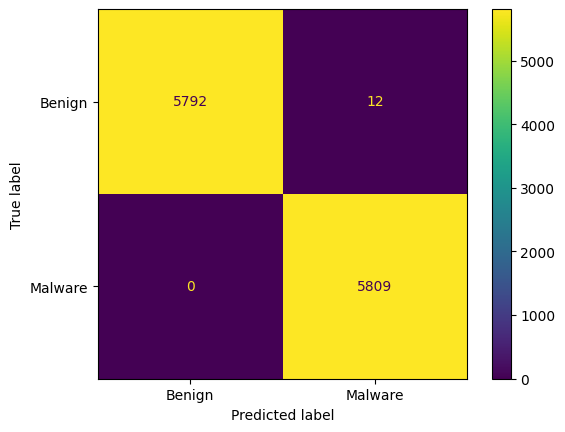

In [26]:
# Import necessary libraries
from sklearn.metrics import ConfusionMatrixDisplay

# Plot the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['Benign', 'Malware'])

# Task 4-Hyperparameters Fine Tuning

<span style="color: yellow;">9 Marks, 3 marks per step from step19 to step21</span>


### 19. Use GridSearchCV to find the best value of C: [0.1, 1, 10], and print out the grid_search.best_params_

In [27]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for C
param_grid = {'C': [0.1, 1, 10]}

# Initialize the SVC classifier
svc_classifier = SVC(kernel='rbf', gamma=1)

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(svc_classifier, param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print out the best parameters
print("Best parameters:", grid_search.best_params_)


Best parameters: {'C': 10}


### 20. Train 2 other classifiers of your choice, one of which is a neural network.

In [28]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# Initialize the classifiers
rf_classifier = RandomForestClassifier(random_state=42)
nn_classifier = MLPClassifier(hidden_layer_sizes=(50,), max_iter=500, random_state=42)

# Train the Random Forest Classifier
rf_classifier.fit(X_train, y_train)

# Train the Neural Network Classifier
nn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_classifier.predict(X_test)
y_pred_nn = nn_classifier.predict(X_test)

# Print classification reports for both classifiers
print("Random Forest Classifier Performance:")
print(classification_report(y_test, y_pred_rf))

print("Neural Network Classifier Performance:")
print(classification_report(y_test, y_pred_nn))

Random Forest Classifier Performance:
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00      5804
     Malware       1.00      1.00      1.00      5809

    accuracy                           1.00     11613
   macro avg       1.00      1.00      1.00     11613
weighted avg       1.00      1.00      1.00     11613

Neural Network Classifier Performance:
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00      5804
     Malware       1.00      1.00      1.00      5809

    accuracy                           1.00     11613
   macro avg       1.00      1.00      1.00     11613
weighted avg       1.00      1.00      1.00     11613



### 21. Compare the results of the three classifiers in a table. Include Accuracy, F1-Score, Precision and Recall.

The table below is showing the first row only, your table should should show three rows, one for each classifier

| Classifier | Precision | Recall | Accuracy | F1-Score |
|------------|-----------|--------|----------|----------|
|   Value 1  |  Value 2  | Value 3| Value 4  | Value 5  |


In [29]:
# Collecting metrics for each classifier
def get_metrics(classifier, X_test, y_pred):
    report = classification_report(y_test, y_pred, output_dict=True)
    labels = list(report.keys())  # This will give you the actual labels used by the classifier (e.g., 'Benign', 'Malware')

    # Retrieve the metrics for each label dynamically
    precision = report[labels[1]]['precision']  # Access precision for the 'Malware' class (or adjust as needed)
    recall = report[labels[1]]['recall']
    f1_score = report[labels[1]]['f1-score']
    accuracy = accuracy_score(y_test, y_pred)
    return precision, recall, accuracy, f1_score

# Get the metrics for each classifier
svc_metrics = get_metrics(svc_classifier, X_test, y_pred)
rf_metrics = get_metrics(rf_classifier, X_test, y_pred_rf)
nn_metrics = get_metrics(nn_classifier, X_test, y_pred_nn)

# Initialize the results in a dictionary
metrics = {
    'Classifier': ['SVC', 'Random Forest', 'Neural Network'],
    'Precision': [svc_metrics[0], rf_metrics[0], nn_metrics[0]],
    'Recall': [svc_metrics[1], rf_metrics[1], nn_metrics[1]],
    'Accuracy': [svc_metrics[2], rf_metrics[2], nn_metrics[2]],
    'F1-Score': [svc_metrics[3], rf_metrics[3], nn_metrics[3]]
}

# Convert the dictionary to a pandas DataFrame
metrics_df = pd.DataFrame(metrics)

# Display the results
print(metrics_df)

       Classifier  Precision    Recall  Accuracy  F1-Score
0             SVC   0.997938  1.000000  0.998967  0.998968
1   Random Forest   0.999828  0.999828  0.999828  0.999828
2  Neural Network   0.999828  0.999828  0.999828  0.999828


# Task 5-Predict Malware Category

<span style="color: yellow;">10 Marks for step 23</span>

### 22.	Revert back to the malware_df_prepared_backup dataset you saved in step 13.

In [30]:
# Revert back to the backup dataframe
malware_df_processed = malware_df_prepared_backup.copy()

### 23.	Repeat Task 3, but this time drop Class and MalwareFamily, and use MalwareCategory as your target.
Do it all (steps 14 to 18) in a single code cell below

(46449, 52) (46449,) (11613, 52)  (11613,)
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00      5804
  Ransomware       0.59      0.55      0.57      1932
     Spyware       0.63      0.63      0.63      1982
      Trojan       0.57      0.62      0.60      1895

    accuracy                           0.80     11613
   macro avg       0.70      0.70      0.70     11613
weighted avg       0.80      0.80      0.80     11613



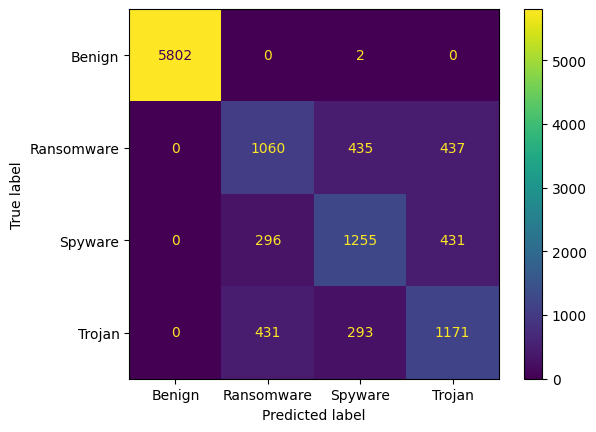

In [31]:
# Exclude 'MalwareFamily', and 'Class' columns from the features (X)
X = malware_df_processed.drop(columns=['MalwareFamily', 'MalwareCategory', 'Class'])

# 2. Set Class as the target variable (y)
y = malware_df_processed['MalwareCategory']

# Split the data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the resulting datasets
print(f"{X_train.shape} {y_train.shape} {X_test.shape}  {y_test.shape}")

# Initialize the SVC classifier with the specified hyperparameters
svc_classifier = SVC(kernel='rbf', gamma=1, C=1)

# Train the classifier on the training data
svc_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svc_classifier.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['Benign', 'Ransomware', 'Spyware', 'Trojan'])

# Task 6-Predict Malware Family

<span style="color: yellow;">10 Marks for step 25</span>

### 24.	Revert back to the malware_df_prepared_backup dataset you saved in step 13.

In [32]:
# Revert back to the backup dataframe
malware_df_processed = malware_df_prepared_backup.copy()

### 25.	Repeat Task 3, but this time drop Class and MalwareCategory, and use MalwareFamily as your target.
Do it all (steps 14 to 18) in a single code cell below

(23064, 52) (23064,) (5767, 52)  (5767,)
              precision    recall  f1-score   support

180solutions       0.24      0.24      0.24       387
         Ako       0.27      0.22      0.24       408
         CWS       0.23      0.16      0.19       394
       Conti       0.24      0.23      0.24       378
      Emotet       0.29      0.34      0.32       378
       Gator       0.47      0.47      0.47       422
        Maze       0.46      0.28      0.35       348
        Pysa       0.36      0.12      0.18       329
     Reconyc       0.36      0.27      0.31       279
     Refroso       0.38      0.55      0.45       396
        Scar       0.32      0.37      0.34       416
       Shade       0.27      0.32      0.29       405
        TIBS       0.88      0.47      0.61       300
 Transponder       0.24      0.38      0.30       500
        Zeus       0.28      0.36      0.32       427

    accuracy                           0.32      5767
   macro avg       0.35      0.32      

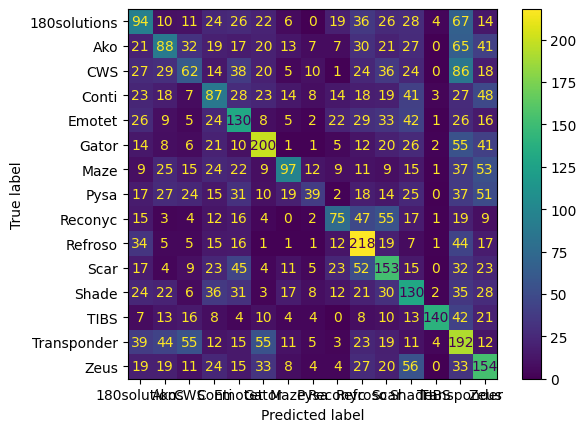

In [33]:
# Drop unnecessary columns and remove rows where MalwareFamily is empty or NaN
malware_df_processed = malware_df_processed[malware_df_processed['MalwareFamily'].notna() & (malware_df_processed['MalwareFamily'] != '')]

# Exclude 'MalwareFamily', and 'Class' columns from the features (X)
X = malware_df_processed.drop(columns=['MalwareFamily', 'MalwareCategory', 'Class'])

# 2. Set Class as the target variable (y)
y = malware_df_processed['MalwareFamily']

# Split the data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the resulting datasets
print(f"{X_train.shape} {y_train.shape} {X_test.shape}  {y_test.shape}")

# Initialize the SVC classifier with the specified hyperparameters
svc_classifier = SVC(kernel='rbf', gamma=1, C=1)

# Train the classifier on the training data
svc_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svc_classifier.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['180solutions', 'Ako', 'CWS', 'Conti', 'Emotet', 'Gator', 'Maze', 'Pysa', 'Reconyc', 'Refroso', 'Scar', 'Shade', 'TIBS', 'Transponder', 'Zeus'])

### 26.	Why do you think the accuracy is this low in this task?
<span style="color: yellow;">5 Marks for step 26</span>

**The low accuracy is likely due to imbalanced data distribution, where some malware families are not represented well, making it hard for the model to generalize. Feature engineering issues may also play a role if the extracted features are not informative enough or contain redundancy. Additionally, SVC and RBF kernel may not be ideal for multi-class classification, especially with suboptimal hyperparameters (gamma=1, C=1). Lastly, overfitting to specific patterns and similarities between malware families could lead to misclassifications, reducing overall performance.**

Code Quality and Style
- Code is clearly formatted and adheres to PEP 8 (or your chosen style guide).
- Variables and functions are named descriptively.
- The code includes clear comments explaining the purpose of code blocks and non-obvious logic.
- Code is structured into modular functions where appropriate.
- Unnecessary or redundant code is avoided.

<span style="color: yellow;">10 Marks for code quality and style</span>
